Date: 03/01/2024 <br>
Des: Plot metrics for broadcast protocols

## Plot histogram of broadcasts and packet receptions,

Total DL Broadcasts: 145
Total DL No. Packets Rcvd: 489


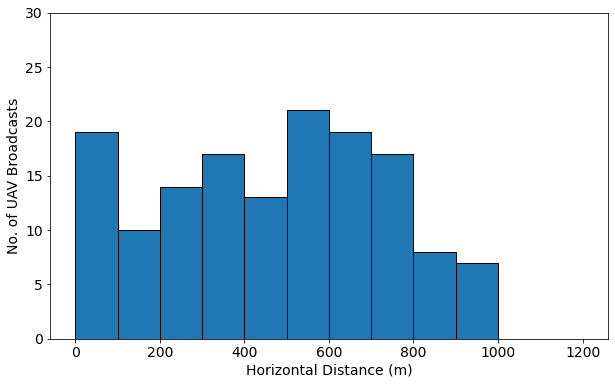

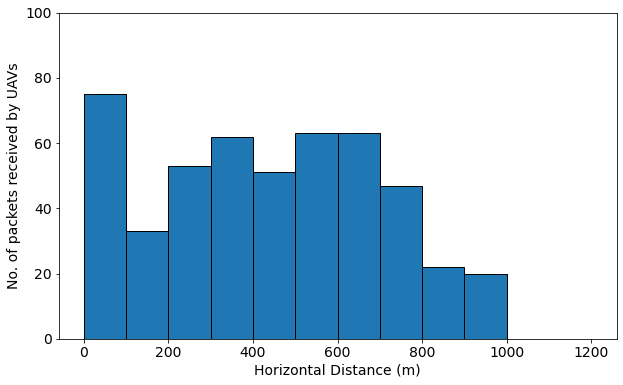

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os

# Get data 
sim_root_path = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Test/fixedProb-0.5_CT-3/UAVSpeed-12_BitRate-13_Height-270_Distance-1200_Modulation-QPSK_UAVSendingInterval-1000_CounterThreshold-3"
scenario_files = glob.glob(sim_root_path + "/*.csv")
gcs_br_file = [file for file in scenario_files if (('_GCS-Broadcast' in file))]
gw_rx_file = [file for file in scenario_files if (('_GW-Rx' in file))]
gw_br_file = [file for file in scenario_files if (('_GW-Broadcast' in file))]
uav_rx_files = [file for file in scenario_files if (('_UAV-' in file) and ('-Rx.csv' in file))]
uav_br_files = [file for file in scenario_files if (('_UAV-' in file) and ('-Broadcast.csv' in file))]
if len(gcs_br_file) > 0:
    gcs_br_df = pd.read_csv(gcs_br_file[0])
gw_br_df = pd.read_csv(gw_br_file[0])
gw_rx_df = pd.read_csv(gw_rx_file[0])
uavs_rx_df_list = []
for uav_rx_file in uav_rx_files:
    uav_rx_df = pd.read_csv(uav_rx_file)
    uav_rx_df = uav_rx_df.sort_values(["Packet_Name", "RxTime"], ascending=[True, True])
    uav_rx_df = uav_rx_df.drop_duplicates(subset='Packet_Name', keep="first")
    uavs_rx_df_list.append(uav_rx_df)
uavs_br_df_list = []
for uav_br_file in uav_br_files:
    uavs_br_df_list.append(pd.read_csv(uav_br_file))
dl_rx_df = pd.concat([gw_rx_df]+uavs_rx_df_list)
dl_br_df = pd.concat([gw_br_df]+uavs_br_df_list)

# Get horizontal distance data
uav_speed = 12
if len(gcs_br_file) > 0:
    gcs_br_df["Horizontal_Distance"] = gcs_br_df["TxTime"] * uav_speed
dl_br_df["Horizontal_Distance"] = dl_br_df["TxTime"] * uav_speed
dl_rx_df["Horizontal_Distance"] = dl_rx_df["RxTime"] * uav_speed

# Filter delay exceeded packets
delay_th = 1
dl_rx_df["Delay"] = dl_rx_df["RxTime"] - dl_rx_df["TxTime"]
dl_rx_df = dl_rx_df.loc[dl_rx_df["Delay"]<=delay_th]

# Plot histogram of UAV broadcast occurences
countsBr, binsBr = np.histogram(dl_br_df["Horizontal_Distance"], bins=12, range=(0,1200))
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.hist(binsBr[:-1], binsBr, weights=countsBr, edgecolor='black')
plt.ylim(0, 30)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("No. of UAV Broadcasts")

# Plot histogram of GCS broadcast occurences
if len(gcs_br_file) > 0:
    countsBr, binsBr = np.histogram(gcs_br_df["Horizontal_Distance"], bins=12, range=(0,1200))
    plt.figure(figsize=(10,6))
    plt.rcParams.update({'font.size': 14})
    plt.hist(binsBr[:-1], binsBr, weights=countsBr, edgecolor='black')
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("No. of GCS Broadcasts")

# Plot histogram of UAV packets received
countsRx, binsRx = np.histogram(dl_rx_df["Horizontal_Distance"], bins=12, range=(0,1200))
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.hist(binsRx[:-1], binsRx, weights=countsRx, edgecolor='black')
plt.ylim(0, 100)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("No. of packets received by UAVs")

print("Total DL Broadcasts: {}".format(len(dl_br_df)))
print("Total DL No. Packets Rcvd: {}".format(len(dl_rx_df)))

## Plot throughput vs horizontal distance

Text(0, 0.5, 'Retransmission Probability')

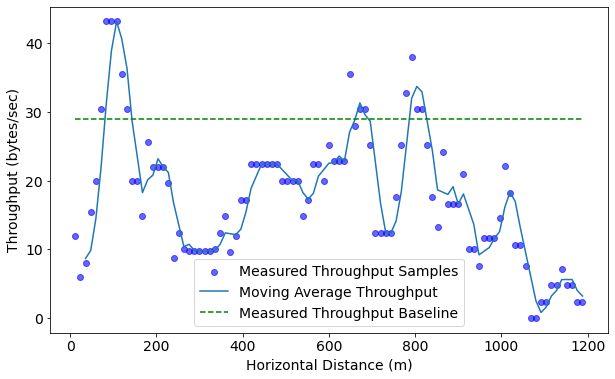

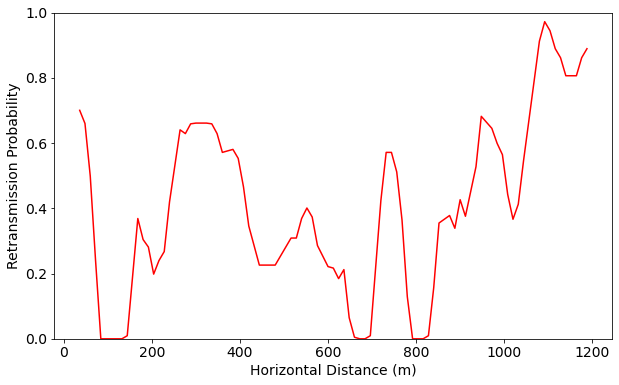

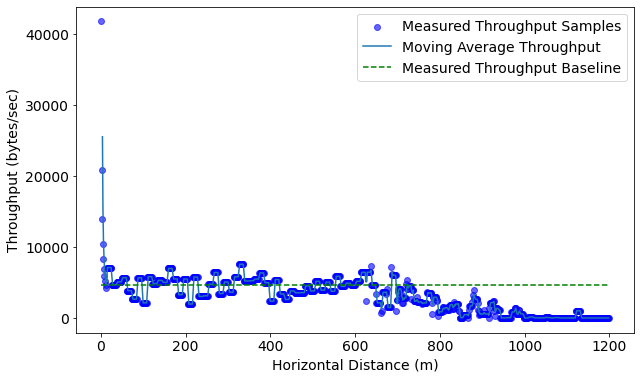

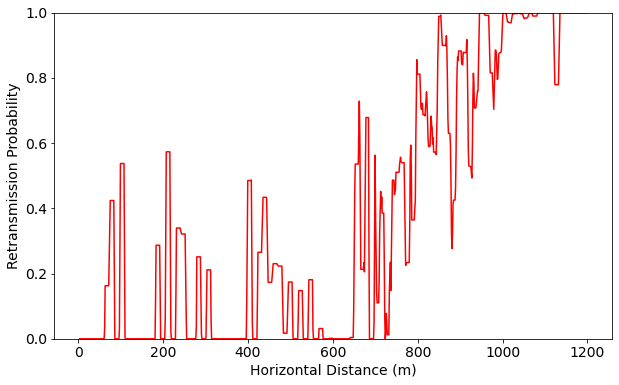

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os

# Get data 
sim_root_path = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Test/measured_throughput_test/UAVSpeed-12_BitRate-13_Height-270_Distance-1200_Modulation-QPSK_UAVSendingInterval-1000_CounterThreshold-3"
scenario_files = glob.glob(sim_root_path + "/*.csv")
gw_throughput_file = [file for file in scenario_files if (('_GW-Throughput' in file))]
gw_throughput_df = pd.read_csv(gw_throughput_file[0])
gcs_throughput_file = [file for file in scenario_files if (('_GCS-Throughput' in file))]
gcs_throughput_df = pd.read_csv(gcs_throughput_file[0])

# Get horizontal distance data
uav_speed = 12
gw_throughput_df["Horizontal_Distance"] = gw_throughput_df["Measurement_Time"] * uav_speed
gcs_throughput_df["Horizontal_Distance"] = gcs_throughput_df["Measurement_Time"] * uav_speed

# Get moving averages
# Gateway
window_size = 3
windows_throughput = gw_throughput_df["Measured_Throughput"].rolling(window_size)
windows_hdist = gw_throughput_df["Horizontal_Distance"].rolling(window_size)
gw_th_moving_avg = windows_throughput.mean().tolist()
gw_hdist_moving_avg = windows_hdist.max().tolist()
# GCS
window_size = 3
windows_throughput = gcs_throughput_df["Measured_Throughput"].rolling(window_size)
windows_hdist = gcs_throughput_df["Horizontal_Distance"].rolling(window_size)
gcs_th_moving_avg = windows_throughput.mean().tolist()
gcs_hdist_moving_avg = windows_hdist.max().tolist()

# Plot gateway measured throughput
gwThroughputBaseline = 28.94
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(gw_throughput_df["Horizontal_Distance"], gw_throughput_df["Measured_Throughput"], c="b", alpha=0.6)
plt.plot(gw_hdist_moving_avg, gw_th_moving_avg)
plt.plot([gw_throughput_df["Horizontal_Distance"].min(), gw_throughput_df["Horizontal_Distance"].max()], [gwThroughputBaseline, gwThroughputBaseline], '--g')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Throughput (bytes/sec)")
plt.legend(["Measured Throughput Samples", "Moving Average Throughput", "Measured Throughput Baseline"])

# Plot gateway broadcast probability
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(gw_hdist_moving_avg, np.clip(1 - np.array(gw_th_moving_avg)/gwThroughputBaseline, a_min=0, a_max=1), 'r')
plt.ylim(0,1)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Retransmission Probability")

# Plot GCS measured throughput
gcsThroughputBaseline = 4593.15
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(gcs_throughput_df["Horizontal_Distance"], gcs_throughput_df["Measured_Throughput"], c="b", alpha=0.6)
plt.plot(gcs_hdist_moving_avg, gcs_th_moving_avg)
plt.plot([gcs_throughput_df["Horizontal_Distance"].min(), gcs_throughput_df["Horizontal_Distance"].max()], [gcsThroughputBaseline, gcsThroughputBaseline], '--g')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Throughput (bytes/sec)")
plt.legend(["Measured Throughput Samples", "Moving Average Throughput", "Measured Throughput Baseline"])

# Plot GCS broadcast probability
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(gcs_hdist_moving_avg, np.clip(1 - np.array(gcs_th_moving_avg)/gcsThroughputBaseline, a_min=0, a_max=1), 'r')
plt.ylim(0,1)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Retransmission Probability")

## Plot Comparison of Broadcast Metrics for Different Protocols (No GCS) under Interference Scenarios

Avg Diff in Reliability between TH with (a) FP: 0.0516375; (b) DV: 0.0290625
Avg Diff in UPRR between TH with (a) FP: 0.09524074760543459; (b) DV: 0.09795136073706259
Avg Diff in Broadcast Score between TH with (a) FP: 0.05566146901843834; (b) DV: 0.04994928551927559


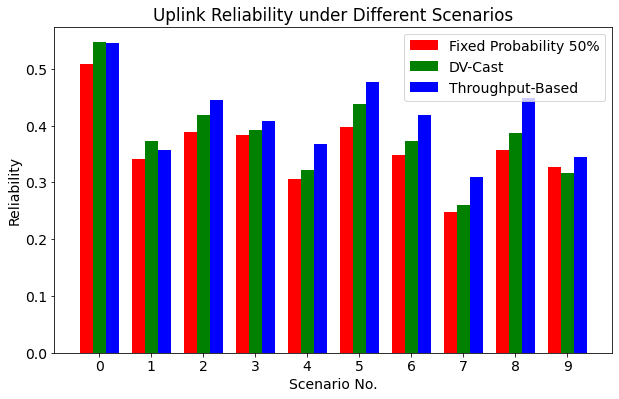

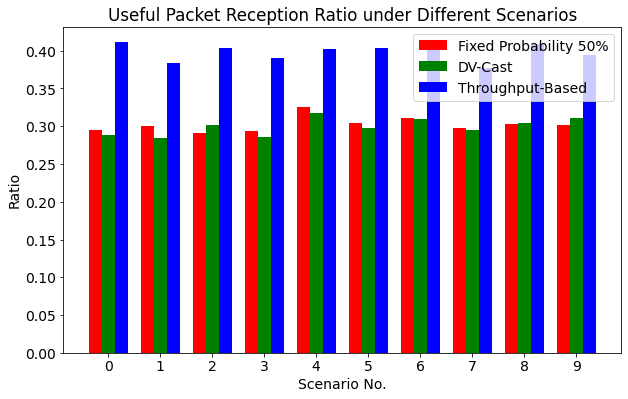

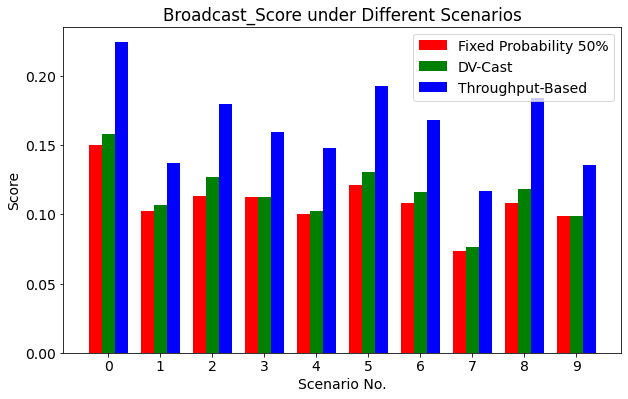

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Get data for fixed probability 50% - interference scenarios ---------------------------------------------------------------------------------
FP_DATASET_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Interference/fixedProb-0.5_CT-3_processed"
broadcast_metric_list = []
scenario_list = [f.path for f in os.scandir(FP_DATASET_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = scenario_params[3].split("-")[-1]
    uavGcsInterfDist = scenario_params[-2].split("-")[-1]
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

# Get data for fixed probability 50% - no interference scenario
FP_DATASET_NO_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_No_Interference/fixedProb-0.5_CT-3_processed"
scenario_list = [f.path for f in os.scandir(FP_DATASET_NO_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = 0 # Just assign zero so that it will be the first case when sorted
    uavGcsInterfDist = 0 # Just assign zero so that it will be the first case when sorted
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

fixed_prob_df = pd.DataFrame(broadcast_metric_list)
fixed_prob_df = fixed_prob_df.sort_values(by=['Interference_Distance', 'UAV_GCS_Interference_Distance'])
fixed_prob_df["Broadcast_Score"] = fixed_prob_df["DL_Reliability"] * fixed_prob_df["Useful_Packet_Reception_Ratio_DL"]

# Get data for DV Cast - interference scenarios ---------------------------------------------------------------------------------
DV_DATASET_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Interference/dvcast_prob_CT-3_processed"
broadcast_metric_list = []
scenario_list = [f.path for f in os.scandir(DV_DATASET_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = scenario_params[3].split("-")[-1]
    uavGcsInterfDist = scenario_params[-2].split("-")[-1]
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

# Get data for DV Cast - no interference scenarios
DV_DATASET_NO_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_No_Interference/dvcast_prob_CT-3_processed"
scenario_list = [f.path for f in os.scandir(DV_DATASET_NO_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = 0 # Just assign zero so that it will be the first case when sorted
    uavGcsInterfDist = 0 # Just assign zero so that it will be the first case when sorted
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

dv_cast_df = pd.DataFrame(broadcast_metric_list)
dv_cast_df = dv_cast_df.sort_values(by=['Interference_Distance', 'UAV_GCS_Interference_Distance'])
dv_cast_df["Broadcast_Score"] = dv_cast_df["DL_Reliability"] * dv_cast_df["Useful_Packet_Reception_Ratio_DL"]

# Get data for throughput-based - interference scenarios ---------------------------------------------------------------------------------
TH_DATASET_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Interference/throughput_based_CT-3_version-3_processed"
broadcast_metric_list = []
scenario_list = [f.path for f in os.scandir(TH_DATASET_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = scenario_params[3].split("-")[-1]
    uavGcsInterfDist = scenario_params[-2].split("-")[-1]
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

# Get data for throughput-based - no interference scenarios
TH_DATASET_NO_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_No_Interference/throughput_based_CT-3_version-3_processed"
scenario_list = [f.path for f in os.scandir(TH_DATASET_NO_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = 0 # Just assign zero so that it will be the first case when sorted
    uavGcsInterfDist = 0 # Just assign zero so that it will be the first case when sorted
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

throughput_based_df = pd.DataFrame(broadcast_metric_list)
throughput_based_df = throughput_based_df.sort_values(by=['Interference_Distance', 'UAV_GCS_Interference_Distance'])
throughput_based_df["Broadcast_Score"] = throughput_based_df["DL_Reliability"] * throughput_based_df["Useful_Packet_Reception_Ratio_DL"]

# Plotting parameters
ind = np.arange(len(throughput_based_df))  
width = 0.25

# Plot Bar for reliability under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_fp = plt.bar(ind, fixed_prob_df["DL_Reliability"].values, width, color = 'r') 
bar_dv = plt.bar(ind + width, dv_cast_df["DL_Reliability"].values, width, color = 'g') 
bar_th = plt.bar(ind + width * 2, throughput_based_df["DL_Reliability"].values, width, color = 'b') 
plt.xlabel("Scenario No.") 
plt.ylabel('Reliability') 
plt.title("Uplink Reliability under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_fp, bar_dv, bar_th), ('Fixed Probability 50%', 'DV-Cast', 'Throughput-Based') ) 

# Plot Bar for Useful_Packet_Reception_Ratio_DL under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_fp = plt.bar(ind, fixed_prob_df["Useful_Packet_Reception_Ratio_DL"].values, width, color = 'r') 
bar_dv = plt.bar(ind + width, dv_cast_df["Useful_Packet_Reception_Ratio_DL"].values, width, color = 'g') 
bar_th = plt.bar(ind + width * 2, throughput_based_df["Useful_Packet_Reception_Ratio_DL"].values, width, color = 'b') 
plt.xlabel("Scenario No.") 
plt.ylabel('Ratio') 
plt.title("Useful Packet Reception Ratio under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_fp, bar_dv, bar_th), ('Fixed Probability 50%', 'DV-Cast', 'Throughput-Based') ) 

# Plot Bar for Broadcast Score under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_fp = plt.bar(ind, fixed_prob_df["Broadcast_Score"].values, width, color = 'r') 
bar_dv = plt.bar(ind + width, dv_cast_df["Broadcast_Score"].values, width, color = 'g') 
bar_th = plt.bar(ind + width * 2, throughput_based_df["Broadcast_Score"].values, width, color = 'b') 
plt.xlabel("Scenario No.") 
plt.ylabel('Score') 
plt.title("Broadcast_Score under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_fp, bar_dv, bar_th), ('Fixed Probability 50%', 'DV-Cast', 'Throughput-Based') ) 

# Calculate Average Difference in Results between TH and FP, DV
avg_diff_rel_th_fp = np.mean(throughput_based_df["DL_Reliability"].values - fixed_prob_df["DL_Reliability"].values)
avg_diff_rel_th_dv = np.mean(throughput_based_df["DL_Reliability"].values - dv_cast_df["DL_Reliability"].values)
avg_diff_upr_th_fp = np.mean(throughput_based_df["Useful_Packet_Reception_Ratio_DL"].values - fixed_prob_df["Useful_Packet_Reception_Ratio_DL"].values)
avg_diff_upr_th_dv = np.mean(throughput_based_df["Useful_Packet_Reception_Ratio_DL"].values - dv_cast_df["Useful_Packet_Reception_Ratio_DL"].values)
avg_diff_bs_th_fp = np.mean(throughput_based_df["Broadcast_Score"].values - fixed_prob_df["Broadcast_Score"].values)
avg_diff_bs_th_dv = np.mean(throughput_based_df["Broadcast_Score"].values - dv_cast_df["Broadcast_Score"].values)

print("Avg Diff in Reliability between TH with (a) FP: {}; (b) DV: {}".format(avg_diff_rel_th_fp, avg_diff_rel_th_dv))
print("Avg Diff in UPRR between TH with (a) FP: {}; (b) DV: {}".format(avg_diff_upr_th_fp, avg_diff_upr_th_dv))
print("Avg Diff in Broadcast Score between TH with (a) FP: {}; (b) DV: {}".format(avg_diff_bs_th_fp, avg_diff_bs_th_dv))

## Plot Comparison between No GCS and With GCS Broadcasting

Avg Diff in Reliability: 0.202725
Avg Diff in UPRR: 0.022701105049945873
Avg Diff in Broadcast Score: 0.0940579318502025


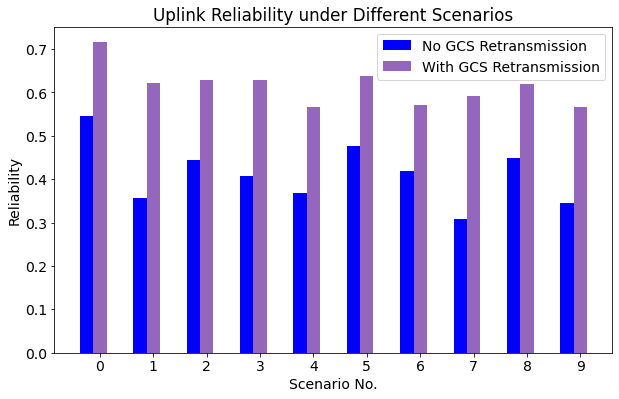

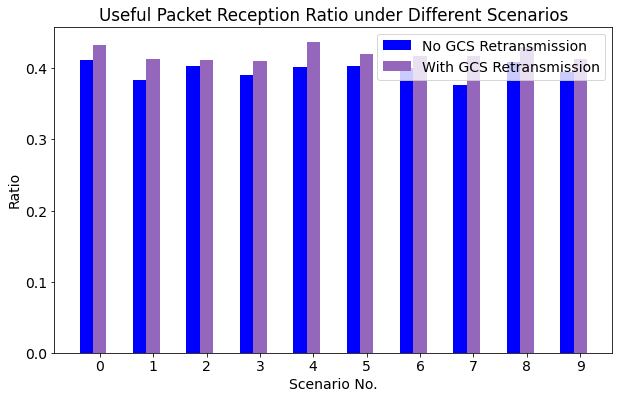

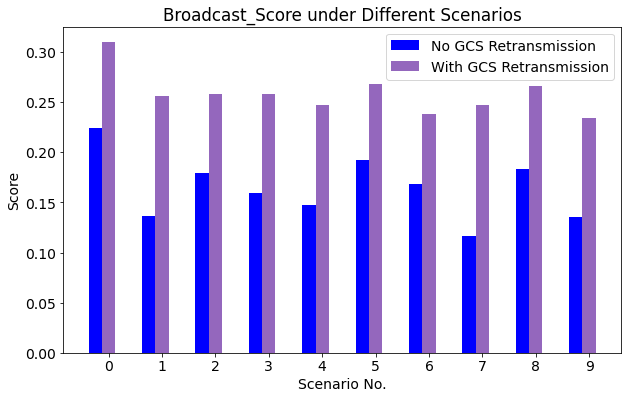

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Get data for throughput-based with NO GCS rebroadcasting - interference scenarios ---------------------------------------------------------------------------------
TH_NO_GCS_DATASET_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Interference/throughput_based_CT-3_version-3_processed"
broadcast_metric_list = []
scenario_list = [f.path for f in os.scandir(TH_NO_GCS_DATASET_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = scenario_params[3].split("-")[-1]
    uavGcsInterfDist = scenario_params[-2].split("-")[-1]
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

# Get data for throughput-based with NO GCS rebroadcasting - no interference scenarios
TH_NO_GCS_DATASET_NO_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_No_Interference/throughput_based_CT-3_version-3_processed"
scenario_list = [f.path for f in os.scandir(TH_NO_GCS_DATASET_NO_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = 0 # Just assign zero so that it will be the first case when sorted
    uavGcsInterfDist = 0 # Just assign zero so that it will be the first case when sorted
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

throughput_no_gcs_df = pd.DataFrame(broadcast_metric_list)
throughput_no_gcs_df = throughput_no_gcs_df.sort_values(by=['Interference_Distance', 'UAV_GCS_Interference_Distance'])
throughput_no_gcs_df["Broadcast_Score"] = throughput_no_gcs_df["DL_Reliability"] * throughput_no_gcs_df["Useful_Packet_Reception_Ratio_DL"]

# Get data for throughput-based with GCS rebroadcasting - interference scenarios ---------------------------------------------------------------------------------
TH_WT_GCS_DATASET_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_Interference/throughput_based_with_GCS_CT-3_version-3_processed"
broadcast_metric_list = []
scenario_list = [f.path for f in os.scandir(TH_WT_GCS_DATASET_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = scenario_params[3].split("-")[-1]
    uavGcsInterfDist = scenario_params[-2].split("-")[-1]
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

# Get data for throughput-based with GCS rebroadcasting - no interference scenarios
TH_WT_GCS_DATASET_NO_INT = "/media/research-student/One Touch/FANET Datasets/DJISpark_ReBroadcast_Protocols_No_Interference/throughput_based_with_GCS_CT-3_version-3_processed"
scenario_list = [f.path for f in os.scandir(TH_WT_GCS_DATASET_NO_INT) if f.is_dir()] # Get list of "unique" scenarios
for scenario in scenario_list:
    # Get params of this senario
    scenario_params = scenario.split("/")[-1].split('_')
    interferenceDist = 0 # Just assign zero so that it will be the first case when sorted
    uavGcsInterfDist = 0 # Just assign zero so that it will be the first case when sorted
    broadcast_metric_file = os.path.join(scenario, "Broadcast_Metrics.csv")
    broadcast_metric_df = pd.read_csv(broadcast_metric_file)
    dl_reliability_avg = broadcast_metric_df["Total_Reliability_DL"].mean()
    useful_packet_ratio_avg = broadcast_metric_df["Useful_Packet_Reception_Ratio_DL"].mean()
    broadcast_metric_list.append({"Interference_Distance": interferenceDist, "UAV_GCS_Interference_Distance": uavGcsInterfDist,
                                  "DL_Reliability": dl_reliability_avg, "Useful_Packet_Reception_Ratio_DL": useful_packet_ratio_avg})

throughput_wt_gcs_df = pd.DataFrame(broadcast_metric_list)
throughput_wt_gcs_df = throughput_wt_gcs_df.sort_values(by=['Interference_Distance', 'UAV_GCS_Interference_Distance'])
throughput_wt_gcs_df["Broadcast_Score"] = throughput_wt_gcs_df["DL_Reliability"] * throughput_wt_gcs_df["Useful_Packet_Reception_Ratio_DL"]

# Plotting parameters
ind = np.arange(len(throughput_no_gcs_df))  
width = 0.25

# Plot Bar for reliability under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_no_gcs = plt.bar(ind, throughput_no_gcs_df["DL_Reliability"].values, width, color = 'b') 
bar_wt_gcs = plt.bar(ind + width, throughput_wt_gcs_df["DL_Reliability"].values, width, color = 'tab:purple') 
plt.xlabel("Scenario No.") 
plt.ylabel('Reliability') 
plt.title("Uplink Reliability under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_no_gcs, bar_wt_gcs), ('No GCS Retransmission', 'With GCS Retransmission') ) 

# Plot Bar for Useful_Packet_Reception_Ratio_DL under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_no_gcs = plt.bar(ind, throughput_no_gcs_df["Useful_Packet_Reception_Ratio_DL"].values, width, color = 'b') 
bar_wt_gcs = plt.bar(ind + width, throughput_wt_gcs_df["Useful_Packet_Reception_Ratio_DL"].values, width, color = 'tab:purple')
plt.xlabel("Scenario No.") 
plt.ylabel('Ratio') 
plt.title("Useful Packet Reception Ratio under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_no_gcs, bar_wt_gcs), ('No GCS Retransmission', 'With GCS Retransmission') ) 

# Plot Bar for Broadcast Score under different scenarios
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
bar_no_gcs = plt.bar(ind, throughput_no_gcs_df["Broadcast_Score"].values, width, color = 'b') 
bar_wt_gcs = plt.bar(ind + width, throughput_wt_gcs_df["Broadcast_Score"].values, width, color = 'tab:purple')
plt.xlabel("Scenario No.") 
plt.ylabel('Score') 
plt.title("Broadcast_Score under Different Scenarios")
plt.xticks(ind+width,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']) 
plt.legend( (bar_no_gcs, bar_wt_gcs), ('No GCS Retransmission', 'With GCS Retransmission') ) 

# Calculate Average Difference in Results between TH and FP, DV
avg_diff_rel = np.mean(throughput_wt_gcs_df["DL_Reliability"].values - throughput_no_gcs_df["DL_Reliability"].values)
avg_diff_upr = np.mean(throughput_wt_gcs_df["Useful_Packet_Reception_Ratio_DL"].values - throughput_no_gcs_df["Useful_Packet_Reception_Ratio_DL"].values)
avg_diff_bs = np.mean(throughput_wt_gcs_df["Broadcast_Score"].values - throughput_no_gcs_df["Broadcast_Score"].values)

print("Avg Diff in Reliability: {}".format(avg_diff_rel))
print("Avg Diff in UPRR: {}".format(avg_diff_upr))
print("Avg Diff in Broadcast Score: {}".format(avg_diff_bs))